# Heat equation steady state and time varying solution using numerical methods

## Janos Revesz, SN: 19111202

In the following notebook we will be investigating the solutions of the 2D heat equation in two forms using numerical methods. The two forms are the time varying and steady state PDEs. The time varying PDE:

$$\frac {\partial^2 \theta}{\partial x^2}+\frac {\partial^2 \theta}{\partial y^2} = \frac {\partial \theta}{\partial t} \frac {C \rho} {\kappa}$$

The solution $\theta(x,y,t)$ shows how the temperature of a 2D rod changes with the spacial coordinates and time.

and the steady state PDE: 
$$\frac {\partial^2 \theta}{\partial x^2}+\frac {\partial^2 \theta}{\partial y^2}=0$$
  
Which is a 2D Laplace equation. In this case  $\theta(x,y)$ shows what the temperature distribution is over the rod after a long time has elapsed and the rod is in equillibrium. Note that the two solutions of the PDEs should match up as $t$ gets larger. 

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 1. Set up the SOR solver

To solve the steady state PDE we are using the Gauss-Seidel method with the successive over-relaxation (SOR) approach. In our case this is an iterative method using finite differences. 

In [2]:
def update_GS_SOR(phi, M, N, omega):
    """Update a MxN grid of phi using SOR and Gauss-Seidel omega is the parameter 
    that mixes present and past values of phi
    phi initial state
    M,N grid points in x and y directions
    omega parameter for Gauss-Seidel SOR method
    """
    
    new_phi = np.copy(phi)
    # Updating the grid using the Gauss-Seidel SOR method
    for i in range(1,M-1):
        for j in range(1,N-1):
            new_phi[i,j] = (1.0+omega)*0.25*(new_phi[i-1,j] + new_phi[i+1,j] + new_phi[i,j-1] + new_phi[i,j+1]) - omega*new_phi[i,j]
    return new_phi

### 2. Set up the array and initial conditions

We are using a rod with a length (x) of 21m and width (y) of 15m. 
The initial conditions are that the temperature of the beginning and the end of the rod are constant 300K and 400K.
Because of the SOR method we are using we need an initial guess of the solution that we can optimize and we choose that the whole rod is 300K apart from the boundary condition. 

$\theta(x,y,t)=300K $ where $ x : [0;20] $

  
  $\theta(x=21,y,t)=400K$

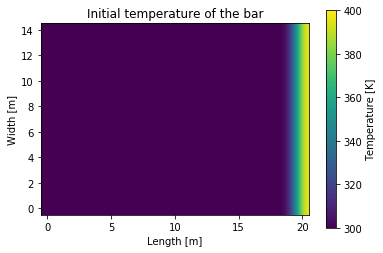

In [3]:
# Parameters to define initial conditions and grid size
M = 15
N = 21
T1 = 300 # K
T2 = 400 # K
# Setting up the grid points and the initial conditions
theta = T1 * np.ones((M,N))
theta[:,-1] = T2

# Plot initial guess
plt.figure()
plt.imshow(theta,interpolation='bicubic',origin='lower')
plt.axis('scaled')
plt.colorbar(label="Temperature [K]")
plt.xlabel("Length [m]")
plt.ylabel("Width [m]")
plt.title("Initial temperature of the bar")
plt.show()

### 3. Run the solver and plot the result

In this section the SOR solver is applied to the steady state PDE. The solver runs until the difference between the the interations is less than the tlerance.

In [4]:
# Guessing an omega between 0 and 1 that should lead to a stable solution
omega = 0.3
# Difference of two iterations updated in each iteration of the loop
delta = 1
# Tolerance
tol = 1e-6
iter = 1

# The loop runs until the difference of two iterations is less than the choosen tolerance
while delta > tol:
    thetain = np.copy(theta)
    theta = update_GS_SOR(thetain,M,N,omega)
    delta = np.max(np.abs(thetain-theta))
    iter += 1
print("Finished after ",iter," iterations")

Finished after  209  iterations


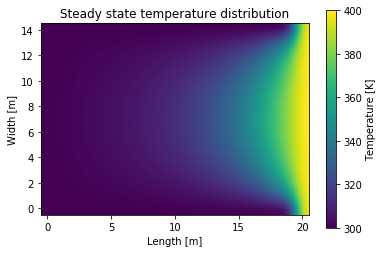

In [5]:
# Plotting the solution
plt.figure()
plt.imshow(theta,interpolation='bicubic',origin='lower')
plt.axis('scaled')
plt.title("Steady state temperature distribution")
plt.colorbar(label="Temperature [K]")
plt.xlabel("Length [m]")
plt.ylabel("Width [m]")
plt.show()

### 4. Time evolution function
Now for the time dependent solution we implement a step-by-step time evolution using forward time differences. We iterate over the bar both in the x and y direction and update the theta function using this difference.
The time step dt is not defined separately but includid in zeta. To be able to define the time step we would have to define zeta as a function of the constants and dx, xy and dt.

  
  $$\zeta = \frac {\kappa \Delta t}{C \rho \Delta x^2 \Delta y^2}$$

In [6]:
def update_temperature2D(temper, M, N, zeta):
    """Perform explicit forward FD update for heat equation
    Inputs:
    temper  Array of temperature at present timestep
    zeta    Constant of proportionality
    """
    # How do you initialise temper_next to preserve boundary conditions?
    temper_next = np.copy(temper)    
    for i in range(1,M-1): 
        for j in range(1,N-1):
            temper_next[i,j] = temper[i,j] + zeta*(temper[i+1,j]+temper[i-1,j]+temper[i,j+1]+temper[i,j-1]-4*temper[i,j])
    return temper_next

### 5. Set up initial conditions

The initial conditions are the same as for the steady state solution. We are again using the same initial guess.

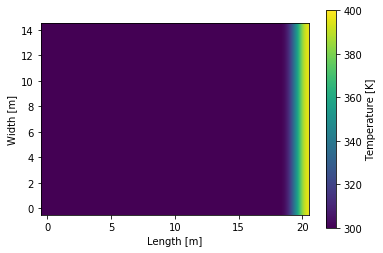

In [7]:
# Initializing grid points and temperatures to apply initial conditions
M = 15
N = 21
T1 = 300 # K
T2 = 400 # K
# Theta0 is the temperature of the bar at t=0
theta0 = T1 * np.ones((M,N))
theta0[:,-1] = T2
# Plot initial guess
plt.figure()
plt.imshow(theta0,interpolation='bicubic',origin='lower')
plt.axis('scaled')
plt.colorbar(label="Temperature [K]")
plt.xlabel("Length [m]")
plt.ylabel("Width [m]")
plt.show()

### 6. Propagate the solution and store selected points

We now use Nt iterations of the update_temperature method to find out how the tempereature function behaves Nt time steps from t=0. 

In [8]:
Nt = 100
zeta = 0.1
for i in range(Nt):
    theta_next = update_temperature2D(theta0,M,N,zeta)
    theta0 = np.copy(theta_next)

### Plot the final and steady-state solutions

The steady state, time varying and the difference of these solutions are all plotted below. 

Text(0.5, 1.0, 'steady state solution-time varying solution')

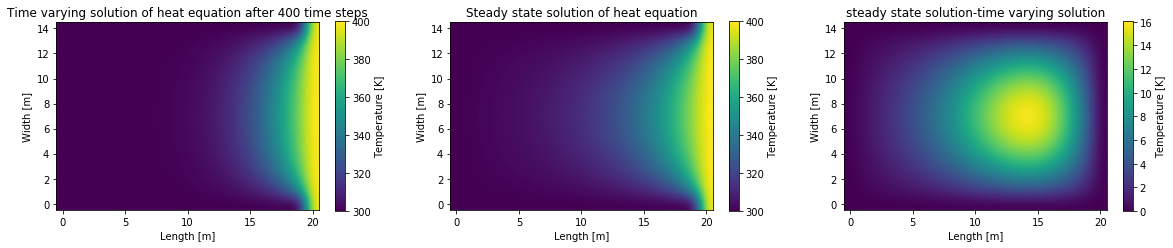

In [9]:
fig1 = plt.figure(figsize=(20,7))

# Time varying heat distribution on rod
ax1 = fig1.add_subplot(1,3,1)
im1 = ax1.imshow(theta0,interpolation='bicubic',origin='lower')
plt.colorbar(im1,label="Temperature [K]",shrink=0.5)
ax1.set_xlabel("Length [m]")
ax1.set_ylabel("Width [m]")
ax1.set_title("Time varying solution of heat equation after 400 time steps")

# Steady state heat distributon on rod
ax2 = fig1.add_subplot(1,3,2)
im2 = ax2.imshow(theta,interpolation='bicubic',origin='lower')
plt.colorbar(im2,label="Temperature [K]",shrink=0.5)
ax2.set_xlabel("Length [m]")
ax2.set_ylabel("Width [m]")
ax2.set_title("Steady state solution of heat equation")

# Difference of the time varying and steady state distribution
ax3 = fig1.add_subplot(1,3,3)
im3 = ax3.imshow(abs(theta-theta0),interpolation='bicubic',origin='lower')
plt.colorbar(im3,label="Temperature [K]",shrink=0.5)
ax3.set_xlabel("Length [m]")
ax3.set_ylabel("Width [m]")
ax3.set_title("steady state solution-time varying solution")

## Conclusion

The steady state solution and the time varying solution are similar, but still have a difference on the scale of 10^1. Because we used dy,dx and,dt as constants in zeta we can't define the time step explicitly. To do this we would have to define zeta as a function of those variables.